In [36]:
# import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Read Data

In [37]:
df = pd.read_csv('medical_cost_insurance.csv')

# Explore Data

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
df.shape

(1338, 7)

In [40]:
# Summery of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see we fetch the information of the dataframe total 7 columns and 1338 rows are there.

There are 2 float columns, 2 int columns, and 3 object column.

In [41]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Here we consider charges column is an label column because we need to find the insurance cost and as we can see above every column has relationship with the charges column.

# Data preprocessing

In [44]:
df['region'].value_counts().sort_values()

region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64

In [45]:
df['children'].value_counts().sort_values()

children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64

In [46]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = df.copy()
data_copy.replace(clean_data, inplace=True)

In [49]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


Smoker, BMI, age are most important column because its determine charges.

In [53]:
# see the count of value in sex, smoker.
print(data_copy['sex'].value_counts().sort_values()) 
print(data_copy['smoker'].value_counts().sort_values())

sex
1    662
0    676
Name: count, dtype: int64
smoker
1     274
0    1064
Name: count, dtype: int64


# EDA

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

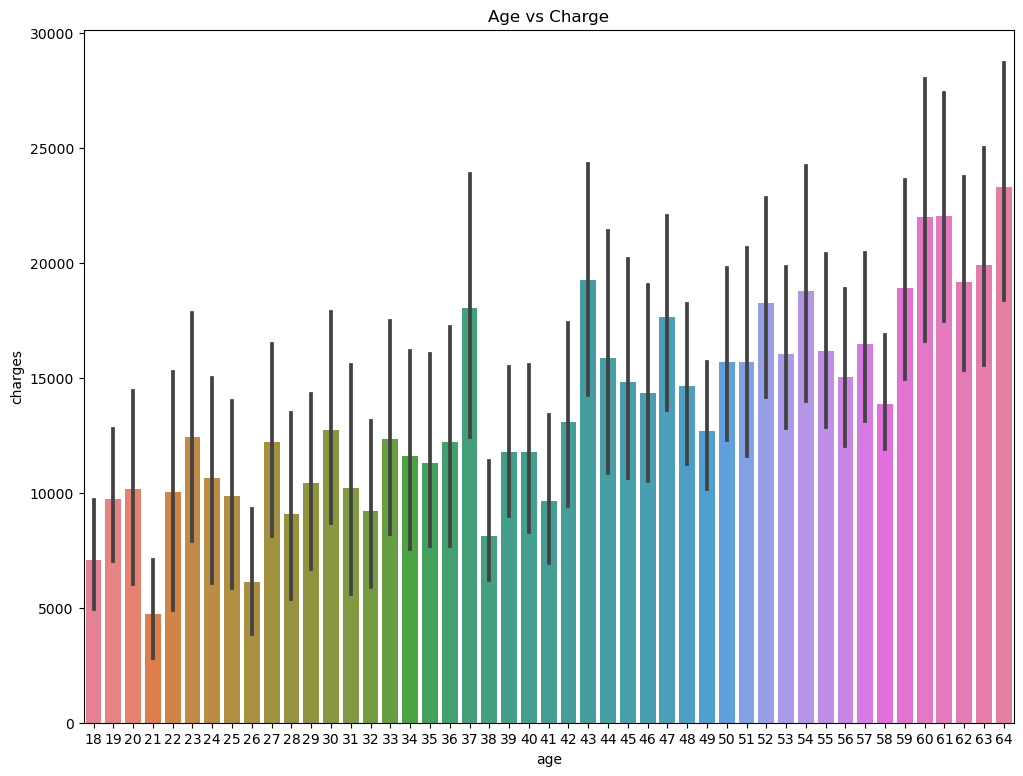

In [55]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')

we can see here while age is increasing charges also increasing so have a relationship between age and charges.

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

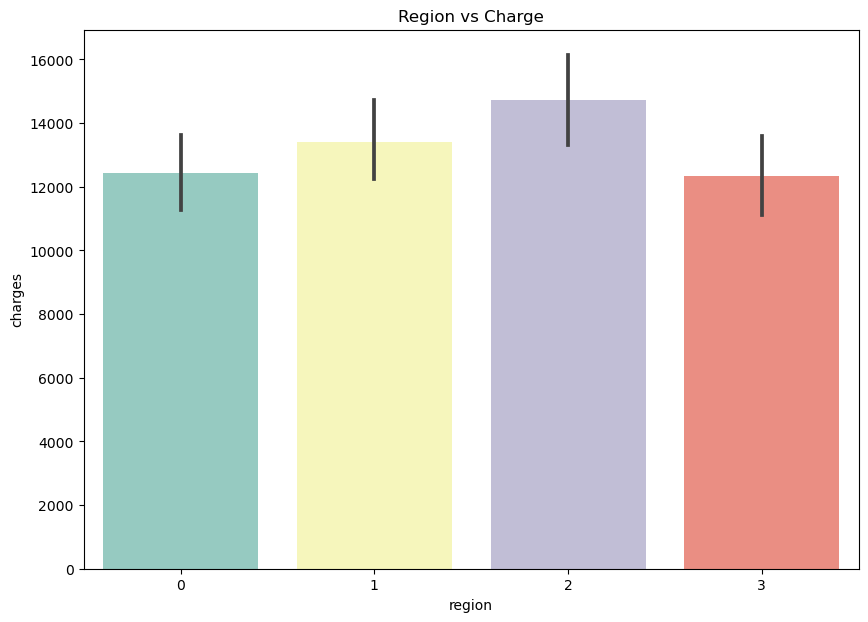

In [56]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')

In southeast region i.e we denotes as 2 number is showing more charges in southeast region.

Text(0.5, 1.0, 'BMI VS Charge')

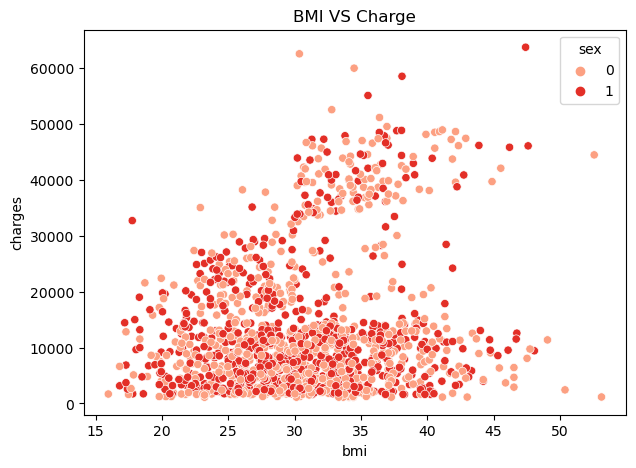

In [57]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

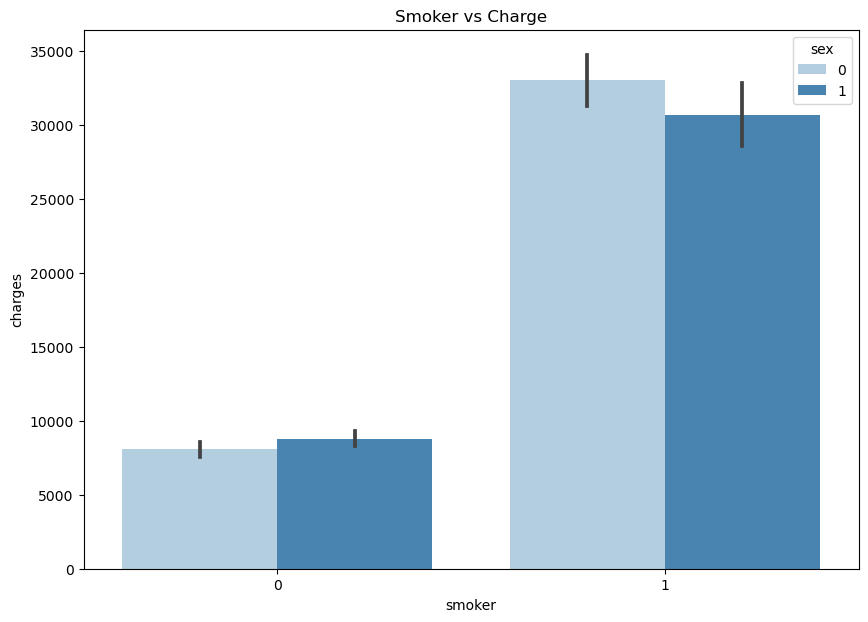

In [58]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex')

<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

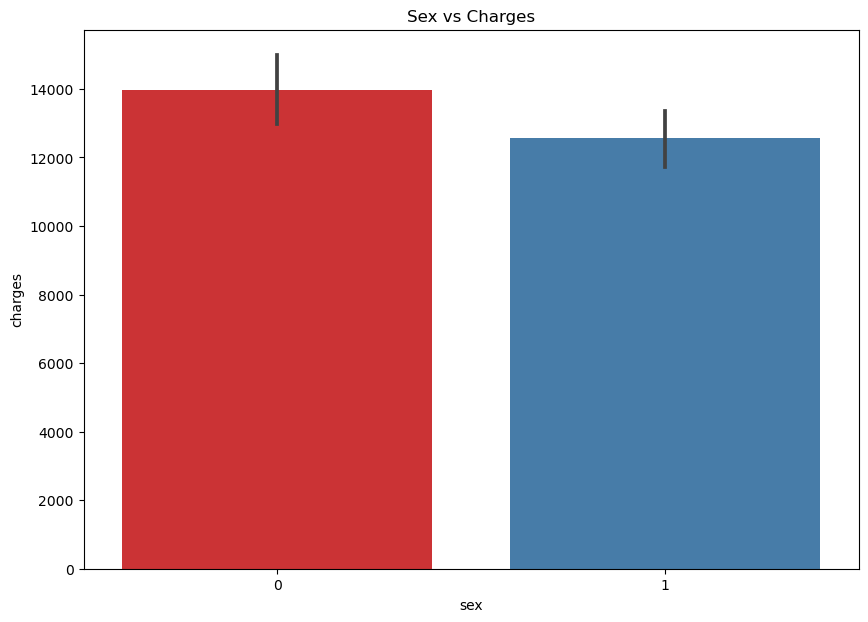

In [59]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')

# Standard Scaler

In [60]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


# Data Spliting

In [63]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

print('Size of X_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1003, 6)
Size of y_train :  (1003,)
Size of X_test :  (335, 6)
Size of Y_test :  (335,)


# Model Building

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [68]:
#for evaluating models

def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

In [69]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [70]:
# Evaluate models
results = {}
for name, model in models.items():
    mae, mse, r2 = evaluate_model(model, x_train, x_test, y_train, y_test)
    results[name] = {"MAE": mae, "MSE": mse, "R2": r2}

In [71]:
# Display results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Absolute Error: {metrics['MAE']}")
    print(f"  Mean Squared Error: {metrics['MSE']}")
    print(f"  R-squared: {metrics['R2']}\n")

Linear Regression:
  Mean Absolute Error: 0.3517124720449255
  Mean Squared Error: 0.24052519069831169
  R-squared: 0.766406252048128

Decision Tree:
  Mean Absolute Error: 0.24354558049151595
  Mean Squared Error: 0.27612342237342474
  R-squared: 0.7318338884079353

Random Forest:
  Mean Absolute Error: 0.21551372956161857
  Mean Squared Error: 0.15458868478875573
  R-squared: 0.8498662440889628

Gradient Boosting:
  Mean Absolute Error: 0.210415284978541
  Mean Squared Error: 0.14416093085651416
  R-squared: 0.8599934915372662



As we can see here we are getting better result on Gradient boosting .